In [1]:
import randl_client

import matplotlib.pyplot as plt
import cartopy

### Create an instance of the driver class

In [2]:
randl = randl_client.Randl()
randl

URL2:http://seismic-ai.com:8011/randl/

-Bulletin-
Start:		2024-05-01T00:00:00
End:		2024-05-11T00:00:00
Stations:	100
Events:		1
Drop fraction:	0.2
Seed:	555

-Window-
Start:			2024-05-10 18:43:15.431390
Length:			1800
Min_phases:		5
Exclude associated:	False

-DML-
Models:		['pwave']
Sampling:	['full']
Num_samples:	10
Arids:		['None']
Pwave_model:	None
Baz_model:	None
Exclude stations:	True

-Beamsearch-
Beam width:	5
Max dist:	5000
Max time:	500
Sequence dist:	500
Sequence time:	500

### Randl Setter Functions
#### Bulletin Generator

`randl.set_bulletin_start('timestamp')`

`randl.set_bulletin_end('timestamp')`

`randl.set_bulletin_n_stations(int)`

`randl.set_bulletin_n_events(int)`

`randl.set_bulletin_drop_fraction(float)`

`randl.set_bulletin_seed(int)`

`bulletin = randl.create_bulletin()`

#### Windowing

`randl.set_window_start('timestamp')`

`randl.set_window_length(int)`

`randl.set_window_phases_required(int)`

`randl.set_window_exclude_associated_phases(Boolean)`

`window = randl.window_catalog(bulletin_dataframe)`

#### DML Predictions

`randl.set_dml_models(list).` Example: ['pwave', 'baz']

`randl.set_dml_sampling(list).` Example: ['kfn', 'knn', 'full', 'random']

`randl.set_dml_num_samples(int)`

`randl.set_dml_exclude_duplicate_stations(Boolean)`

`randl.set_dml_pwave_model("mlflow_model_path")`

`dml_predictions = randl.dml_prediction(window_dataframe)`

#### Beamsearch

`randl.set_beamwidth(int)`

`randl.set_beam_maxdist(int)`

`randl.set_beam_maxtime(int)`

`randl.set_beam_sequencedist(int)`

`randl.set_beam_sequencetimedist(int)`

`randl.beamsearch(window_dataframe, dml_predictions_dataframe)`

### Utility functions for scaling, unscaling, and constants used

In [3]:
randl_client.util.lonlat_to_geocentric(22, 15, 9)

(5713490.291534261, 2308399.918834397, 1640102.4695672975)

In [4]:
randl_client.util.geocentric_to_lonlat(22, 15, 9)

(34.28687697720896, 90.0, -6356743.314245179)

In [5]:
randl_client.util.scale_time(65.2)

0.07244444444444445

In [6]:
randl_client.util.scale_geocentric(44444,33333,55555)

(0.0069681789525686405, 0.005226134214426453, 0.008710223690710828)

In [7]:
randl_client.util.unscale_geocentric(0.5,0.2,0.8)

(3189068.500000001, 1275627.4000000008, 5102509.6000000015)

In [8]:
randl_client.util.constants()

{'Earth radius': 6378.137}

### Octree surrogate model calls

In [9]:
inputs = [[0.15318064, -0.1910636 , -0.9663009 , -0.7103696 ,  0.49366274,    -0.28269523], [0.15328064, -0.1230636 , -0.9443009 , -0.7103696 ,  0.49366274,    -0.33369523]]

In [10]:
randl.taup_surrogate(inputs)

{'predictions': [0.7754557132720947, 0.7543653845787048]}

In [11]:
randl.baz_surrogate(inputs)

{'predictions': [-0.9549453854560852,
  -0.2548316717147827,
  -0.9923339486122131,
  -0.06697148084640503]}

In [12]:
### Analytical model
source_lat, source_lon = 34.05, -118.25  # Los Angeles, CA
st_lat, st_lon = 37.77, -122.42  # San Francisco, CA

randl.baz_geo_surrogate(source_lat, source_lon, st_lat, st_lon)

326 req: {'source_lat': 34.05, 'source_lon': -118.25, 'st_lat': 37.77, 'st_lon': -122.42}


{'baz_cos': -0.7241238454468915, 'baz_sin': 0.6896699619783412}

### Single window association example

In [13]:
# Creating a synthetic bulletin
randl.set_bulletin_start('2024-05-01T00:00:00')
randl.set_bulletin_end('2024-05-01T2:30:00')
randl.set_bulletin_n_stations(100)
randl.set_bulletin_n_events(1)
randl.set_bulletin_drop_fraction(0.2)
randl.set_bulletin_seed(111)
bulletin = randl.create_bulletin()

In [14]:
bulletin

,STA,LAT_STA,LON_STA,ARID,TIME_ARRIV,IPHASE,ORID,ORIG_TIME,ORIG_LAT,ORIG_LON,BACK_AZIMUTH
0,45,56.491988,-26.515362,0,2024-05-01 01:41:54.825360,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
1,30,57.099611,-55.173284,1,2024-05-01 01:41:58.213445,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
2,21,61.302537,-14.734537,2,2024-05-01 01:42:09.513074,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
3,22,56.737342,11.605741,7,2024-05-01 01:44:55.875169,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
4,23,88.371873,-53.174814,8,2024-05-01 01:45:05.749123,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
5,49,55.186389,-96.014403,9,2024-05-01 01:45:16.268330,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
6,34,89.725274,-168.548402,10,2024-05-01 01:45:17.047201,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
7,51,84.016661,57.921130,11,2024-05-01 01:45:27.762903,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
8,10,88.328244,145.044196,12,2024-05-01 01:45:30.266891,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0
9,47,79.807116,-140.251917,13,2024-05-01 01:45:44.038256,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,0


### Obtaining initial DML model predictions

In [35]:
randl.set_window_start(bulletin.loc[0,"TIME_ARRIV"])
randl.set_window_length(2800)
randl.set_window_phases_required(5)
randl.set_window_exclude_associated_phases(False)
window = randl.window_catalog(bulletin)

randl.set_dml_models(['pwave'])
randl.set_dml_sampling(['kfn'])
randl.set_dml_num_samples(30)
randl.set_dml_exclude_duplicate_stations(True)
dml_predictions = randl.dml_prediction(window)

In [36]:
dml_predictions

,ARID,STA,sampling,features,p_anchors,source_X_unscaled,source_Y_unscaled,source_Z_unscaled,Time_unscaled,source_X_scaled,...,DEPTH_ORIG,Loc_uncertainty,T_uncertainty,Loc_uncertainty_unscaled,T_uncertainty_unscaled,x_std,y_std,z_std,model,TIME_ORIG
0,"[0, 1, 2, 7, 31]","[45, 30, 21, 22, 60]",kfn,"[0.4951392412, 0.3109428018, 0.4655942462, 0.5...",2024-05-01 01:41:54.825360,1.727905e+06,-1.963310e+06,5.400412e+06,186.369377,0.270911,...,-360406.580299,0.958410,0.975155,265.269246,22.360574,0.058892,0.035414,0.030465,pwave,2024-05-01 01:38:48.455982625
1,"[0, 1, 2, 7, 38]","[45, 30, 21, 22, 83]",kfn,"[0.4951392412, 0.3109428018, 0.4655942462, 0.5...",2024-05-01 01:41:54.825360,1.735260e+06,-1.938033e+06,5.408849e+06,182.583842,0.272064,...,-358856.548348,0.962567,0.974851,238.751390,22.634483,0.053740,0.032485,0.026073,pwave,2024-05-01 01:38:52.241518319
2,"[0, 1, 2, 48, 22]","[45, 30, 21, 67, 75]",kfn,"[0.4951392412, 0.3109428018, 0.4655942462, -0....",2024-05-01 01:41:54.825360,2.135373e+06,-1.632047e+06,5.340206e+06,151.648986,0.334796,...,-382661.613498,0.971296,0.978167,183.076647,19.649800,0.036999,0.029063,0.020049,pwave,2024-05-01 01:39:23.176373660
3,"[2, 1, 32, 48, 24]","[21, 30, 76, 67, 20]",kfn,"[0.4655942462, 0.3109428018, 0.450449037500000...",2024-05-01 01:41:58.213445,2.391674e+06,-2.064258e+06,5.035206e+06,158.778083,0.374980,...,-418480.689320,0.970759,0.979301,186.501282,18.628735,0.031894,0.031256,0.024572,pwave,2024-05-01 01:39:19.435361676
4,"[2, 44, 32, 0, 27]","[21, 36, 76, 45, 78]",kfn,"[0.4655942462, 0.2797957842, 0.450449037500000...",2024-05-01 01:41:54.825360,2.694129e+06,-1.334181e+06,5.059581e+06,128.754777,0.422401,...,-476926.933238,0.959384,0.975590,259.051502,21.969401,0.037811,0.055524,0.028512,pwave,2024-05-01 01:39:46.070583284
5,"[2, 44, 32, 0, 28]","[21, 36, 76, 45, 99]",kfn,"[0.4655942462, 0.2797957842, 0.450449037500000...",2024-05-01 01:41:54.825360,2.639120e+06,-1.423539e+06,5.042727e+06,127.077243,0.413776,...,-495415.350316,0.959803,0.974175,256.380879,23.242860,0.043793,0.050450,0.026347,pwave,2024-05-01 01:39:47.748117268
6,"[2, 44, 32, 0, 33]","[21, 36, 76, 45, 66]",kfn,"[0.4655942462, 0.2797957842, 0.450449037500000...",2024-05-01 01:41:54.825360,2.653693e+06,-1.408467e+06,5.076146e+06,134.682378,0.416061,...,-463707.101762,0.958420,0.977895,265.205188,19.894736,0.036604,0.057784,0.030354,pwave,2024-05-01 01:39:40.142981827
7,"[2, 44, 32, 0, 36]","[21, 36, 76, 45, 3]",kfn,"[0.4655942462, 0.2797957842, 0.450449037500000...",2024-05-01 01:41:54.825360,2.672980e+06,-1.389240e+06,5.068788e+06,132.562360,0.419085,...,-465920.351723,0.956159,0.977251,279.624764,20.473742,0.037101,0.064368,0.030054,pwave,2024-05-01 01:39:42.262999832
8,"[2, 44, 32, 0, 39]","[21, 36, 76, 45, 96]",kfn,"[0.4655942462, 0.2797957842, 0.450449037500000...",2024-05-01 01:41:54.825360,2.626526e+06,-1.407145e+06,5.093466e+06,134.100996,0.411801,...,-461157.866428,0.958125,0.978178,267.086775,19.639540,0.037701,0.057486,0.030439,pwave,2024-05-01 01:39:40.724364042
9,"[2, 44, 32, 0, 42]","[21, 36, 76, 45, 31]",kfn,"[0.4655942462, 0.2797957842, 0.450449037500000...",2024-05-01 01:41:54.825360,2.591732e+06,-1.365912e+06,5.128600e+06,130.995333,0.406346,...,-455611.117952,0.958140,0.977482,266.989594,20.266034,0.037392,0.059873,0.028316,pwave,2024-05-01 01:39:43.830026805


### Obtaining Beamsearch prediction

In [37]:
randl.set_beamwidth(30)
randl.set_beam_maxdist(1000)
randl.set_beam_maxtime(100)
randl.set_beam_sequencedist(300)
randl.set_beam_sequencetimedist(100)
beam_result = randl.beamsearch(window, dml_predictions)

In [38]:
beam_result

{'scaled_centroid': [0.3415792967571429,
  -0.3159340279428572,
  0.8034642338857143],
 'unscaled_centroid': [-42.76640078209201,
  60.103852728722686,
  -440229.6055138996],
 'time': '2024-05-01T01:39:25.949413',
 'score': 0.6559158232341262,
 'used_arids': [0,
  1,
  2,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  18,
  21,
  22,
  24,
  25,
  26,
  27,
  28,
  31,
  32,
  33,
  36,
  38,
  39,
  42,
  44,
  46,
  47,
  48]}

### Plotting results

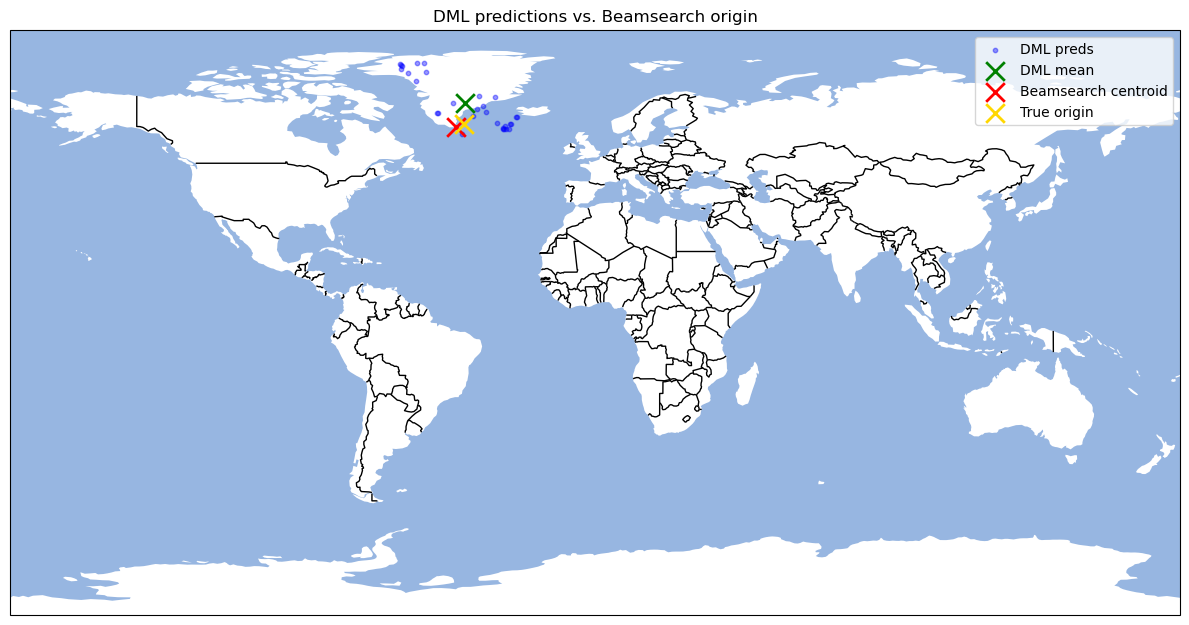

origin lat:     60.9805442979
dml_mean  lat:  67.53099289684333
beamsearch lat: 60.103852728722686
origin lon:     -40.2496747424
dml_mean  lon:  -39.90973985359334
beamsearch lon: -42.76640078209201


In [39]:
import matplotlib.pyplot as plt
from statistics import mean
import cartopy
from dateutil import parser

origin_time = bulletin.loc[0,"ORIG_TIME"]
origin_lon = bulletin.loc[0,"ORIG_LON"]
origin_lat = bulletin.loc[0,"ORIG_LAT"]
dml_lat_mean = mean(dml_predictions.LAT_ORIG)
dml_lon_mean = mean(dml_predictions.LON_ORIG)
beamsearch_lon = beam_result['unscaled_centroid'][0]

beamsearch_lat = beam_result['unscaled_centroid'][1]
beamsearch_time = parser.parse(beam_result['time'])

plt.rcParams['figure.figsize'] = [12,12]
geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.OCEAN)
geo_axes.scatter(dml_predictions['LON_ORIG'], dml_predictions['LAT_ORIG'], marker='.', s=40, linewidth=1, c='b', alpha=0.4, label="DML preds")
geo_axes.scatter(dml_lon_mean, dml_lat_mean, marker='x', linewidth=2, c='g', s=180, alpha=1, label="DML mean")
geo_axes.scatter(beamsearch_lon, beamsearch_lat, marker='x', linewidth=2, c='r', s=180, alpha=1, label="Beamsearch centroid")
geo_axes.scatter(origin_lon, origin_lat, marker='x', linewidth=2, c='gold', s=180, alpha=1, label="True origin")
geo_axes.set_global()

plt.title("DML predictions vs. Beamsearch origin")
plt.legend()
plt.tight_layout()
plt.show()

print("origin lat:    ", origin_lat)
print("dml_mean  lat: ", dml_lat_mean)
print("beamsearch lat:", beamsearch_lat)

print("origin lon:    ", origin_lon)
print("dml_mean  lon: ", dml_lon_mean)
print("beamsearch lon:", beamsearch_lon)

### Full bulletin association example
#### Creating a synthetic bulletin with 6 events from 50 stations over 6 hours

In [40]:
randl.set_bulletin_start('2024-05-01T00:00:00')
randl.set_bulletin_end('2024-05-01T6:00:00')
randl.set_bulletin_n_stations(50)
randl.set_bulletin_n_events(6)
randl.set_bulletin_drop_fraction(0.2)
randl.set_bulletin_seed(23)
bulletin = randl.create_bulletin()

### Setting parameters

In [41]:
randl.set_dml_models(['pwave'])
randl.set_dml_sampling(['random'])
randl.set_dml_num_samples(60)
randl.set_dml_exclude_duplicate_stations(True)

randl.set_beamwidth(5)
randl.set_beam_maxdist(1000)
randl.set_beam_maxtime(100)
randl.set_beam_sequencedist(300)
randl.set_beam_sequencetimedist(100)

### Full association

In [42]:
origins = randl.associate_bulletin(bulletin, travel_time=600, verbose=False)
origins

Error: 500 Internal Server Error
Expecting value: line 1 column 1 (char 0)
10 origins found in bulletin.


,Window_start,Window_end,DML_mean_lat,DML_mean_lon,Beamsearch_lat,Beamsearch_lon,Beamsearch_time,associated_arids,Beamsearch_score,Beamsearch_elev,Beamsearch_x,Beamsearch_y,Beamsearch_z
0,2024-05-01 00:07:11.627115,2024-05-01 00:14:00.117701,18.693779,158.300354,20.329557,165.61505,2024-05-01 00:02:36.983153,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 15, 16...",0.692503,-379406.558272,-0.854647,0.219197,0.324567
1,2024-05-01 00:47:26.046915,2024-05-01 00:56:27.611484,84.16783,140.127978,83.61019,147.986381,2024-05-01 00:46:41.176121,"[48, 49, 51, 53, 55, 56, 57, 58, 60, 61, 62]",0.963111,-348285.734931,-0.089528,0.055973,0.936147
2,2024-05-01 00:57:31.268322,2024-05-01 00:58:42.809854,82.226321,144.447291,82.297704,142.471461,2024-05-01 00:47:07.713198,"[66, 67, 68, 69, 71, 72]",0.957827,-382232.826651,-0.100271,0.077020,0.928208
3,2024-05-01 01:27:27.933035,2024-05-01 01:36:57.073657,-62.160694,35.12182,-55.606917,40.89156,2024-05-01 01:26:21.099884,"[96, 97, 100, 102, 104, 107, 90, 91, 94, 95]",0.950336,-572841.035417,0.389637,0.337413,-0.747420
4,2024-05-01 01:37:16.770408,2024-05-01 01:39:28.184392,-64.203156,41.07333,-63.625544,38.207938,2024-05-01 01:27:17.644522,"[112, 114, 115, 116, 117, 108, 111]",0.960062,-498778.687438,0.322712,0.254022,-0.822252
5,2024-05-01 01:48:46.033816,2024-05-01 01:58:41.124008,34.34832,-150.169854,34.961154,-150.334529,2024-05-01 01:47:06.993695,"[133, 134, 135, 136, 137, 140, 142, 144, 147, ...",0.958541,-394533.368921,-0.668858,-0.380976,0.534366
6,2024-05-01 01:48:46.033816,2024-05-01 01:58:41.124008,29.773894,-150.154346,29.176429,-150.601637,2024-05-01 01:46:42.129063,"[128, 145, 146, 150, 138, 139, 143]",0.938696,-239337.364268,-0.732750,-0.412856,0.466329
7,2024-05-01 03:30:33.696807,2024-05-01 03:37:27.626061,28.642412,8.012802,26.360754,6.219046,2024-05-01 03:24:56.005920,"[192, 195, 175, 176, 177, 178, 179, 180, 181, ...",0.957831,-388710.799857,0.837046,0.091214,0.414280
8,2024-05-01 03:55:19.941977,2024-05-01 04:04:38.682972,6.88958,123.198627,5.859215,122.450538,2024-05-01 03:52:33.903849,"[227, 228, 229, 230, 231, 235, 212, 213, 216, ...",0.958846,-287962.169584,-0.509688,0.801576,0.096796
9,2024-05-01 03:55:19.941977,2024-05-01 04:04:31.094537,3.277022,124.254236,3.864603,124.110887,2024-05-01 03:52:13.593601,"[225, 226, 211, 214, 232, 233, 234]",0.951036,-247235.311286,-0.537841,0.794063,0.064336


### Removing low scoring origins

In [43]:
origins_trimmed = origins[origins.Beamsearch_score > 0.9]

### Plotting results

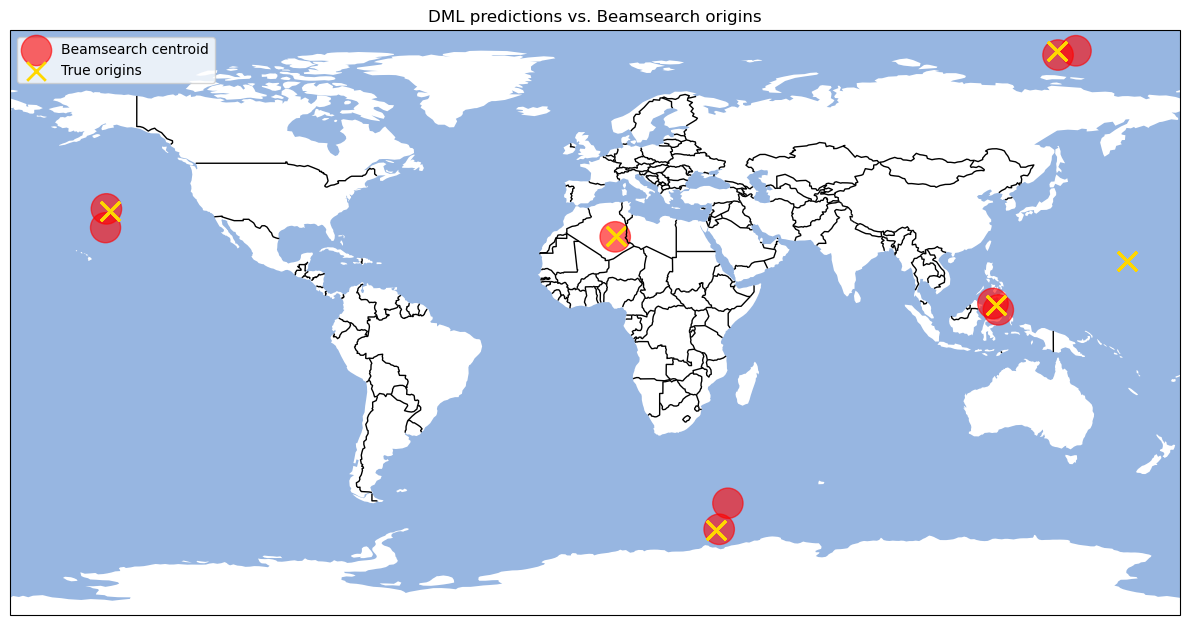

In [44]:
plt.rcParams['figure.figsize'] = [12,12]

beam_sizes = [x*500 for x in origins_trimmed.Beamsearch_score.tolist()]

geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.OCEAN)
geo_axes.scatter(origins_trimmed.Beamsearch_lon, origins_trimmed.Beamsearch_lat, c='r', s=beam_sizes, alpha=0.6, label="Beamsearch centroid")
geo_axes.scatter(bulletin.ORIG_LON, bulletin.ORIG_LAT, marker='x', linewidth=2, c='gold', s=180, alpha=1, label="True origins")
geo_axes.set_global()

plt.title("DML predictions vs. Beamsearch origins")
plt.legend()
plt.tight_layout()
plt.show()

### Full association of 10 hour bulletin with 10 events from 100 stations

In [45]:
randl.set_bulletin_start('2024-05-01T00:00:00')
randl.set_bulletin_end('2024-05-01T10:00:00')
randl.set_bulletin_n_stations(100)
randl.set_bulletin_n_events(10)
randl.set_bulletin_drop_fraction(0.2)
randl.set_bulletin_seed(23)
bulletin = randl.create_bulletin()

In [51]:
randl.set_dml_models(['pwave'])
randl.set_dml_sampling(['random'])
randl.set_dml_num_samples(50)
randl.set_dml_exclude_duplicate_stations(True)

randl.set_beamwidth(5)
randl.set_beam_maxdist(1000)
randl.set_beam_maxtime(180)
randl.set_beam_sequencedist(400)
randl.set_beam_sequencetimedist(180)

In [52]:
origins = randl.associate_bulletin(bulletin, exclude_associated_phases=True, travel_time=600, verbose=False)

26 origins found in bulletin.


In [53]:
min(origins.Beamsearch_score)

0.8215572403500029

In [54]:
max(origins.Beamsearch_score)

0.9618847302595829

### Plotting results (with applied score threshold)

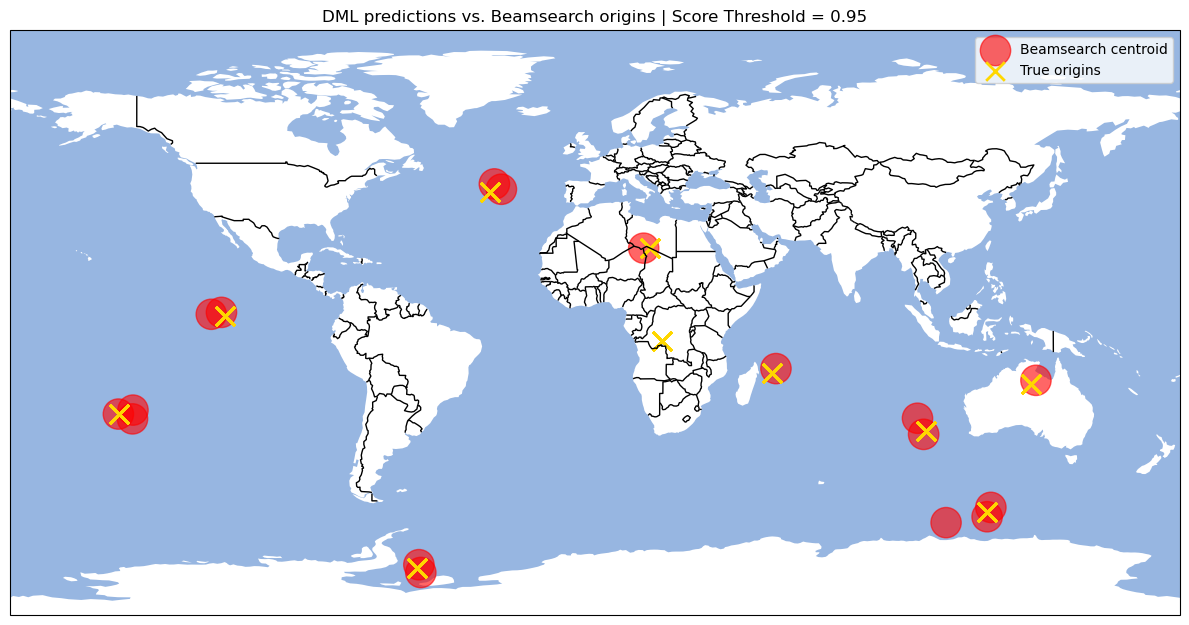

17


In [61]:
threshold = 0.95

origins_trimmed = origins[origins.Beamsearch_score > threshold]

plt.rcParams['figure.figsize'] = [12,12]

beam_sizes = [x*500 for x in origins_trimmed.Beamsearch_score.tolist()]

geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.OCEAN)
geo_axes.scatter(origins_trimmed.Beamsearch_lon, origins_trimmed.Beamsearch_lat, c='r', s=beam_sizes, alpha=0.6, label="Beamsearch centroid")
geo_axes.scatter(bulletin.ORIG_LON, bulletin.ORIG_LAT, marker='x', linewidth=2, c='gold', s=180, alpha=1, label="True origins")
geo_axes.set_global()

plt.title("DML predictions vs. Beamsearch origins | Score Threshold = " + str(threshold))
plt.legend()
plt.tight_layout()
plt.show()
print(len(origins_trimmed))